In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)

In [21]:
dataset = pd.read_excel("영화 데이터.xlsx")

In [189]:
dataset.shape

(40940, 18)

In [190]:
# 영화 개봉 후 발생하는 데이터 제거

df = dataset.drop(['순위', '매출액', '점유율', '관객수', '누적관객수', '스크린수', '상영횟수', '국적'], axis=1)

In [191]:
df.dtypes

영화명              object
개봉일      datetime64[ns]
누적매출액             int64
대표국적             object
제작사              object
배급사              object
등급               object
장르               object
감독               object
배우               object
dtype: object

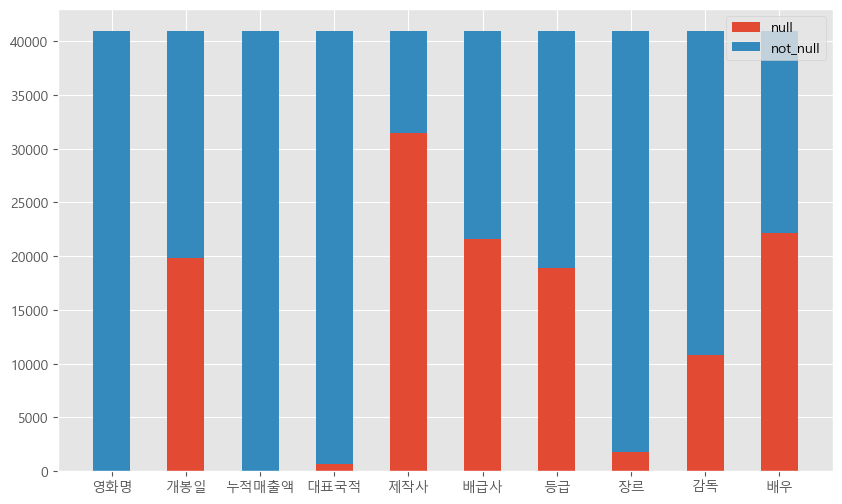

In [192]:
# 결측치 비교

null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [193]:
# 제작사 결측치가 대부분이라서 삭제

df = df.drop(['제작사'], axis=1)

In [194]:
# 배우 5명까지 새로운 열로 추가하고 기존 배우 열 삭제

for i in range(1, 6):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]

df = df.drop(['배우'], axis=1)

In [195]:
# 원-핫 인코딩, 장르를 더미변수로 생성하고 기존 장르 열 삭제

genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df = df.drop(['장르'], axis=1)

In [196]:
# 감독 1명만 남김

df['감독'] = df['감독'].str.split(',').str[0]

In [197]:
# 배급사 1개만 남김

df['배급사'] = df['배급사'].str.split(',').str[0]

In [200]:
# 관람 등급 1개만 남김

df['등급'] = df['등급'].str.split(',').str[0]

In [ ]:
# 개봉일 결측치

In [202]:
df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df = df.drop(['개봉일'], axis=1)

In [205]:
df.dtypes

영화명          object
누적매출액         int64
대표국적         object
배급사          object
등급           object
감독           object
배우1          object
배우2          object
배우3          object
배우4          object
배우5          object
SF            int64
가족            int64
공연            int64
공포(호러)        int64
기타            int64
다큐멘터리         int64
드라마           int64
멜로/로맨스        int64
뮤지컬           int64
미스터리          int64
범죄            int64
사극            int64
서부극(웨스턴)      int64
성인물(에로)       int64
스릴러           int64
애니메이션         int64
액션            int64
어드벤처          int64
전쟁            int64
코미디           int64
판타지           int64
년           float64
월           float64
일           float64
dtype: object

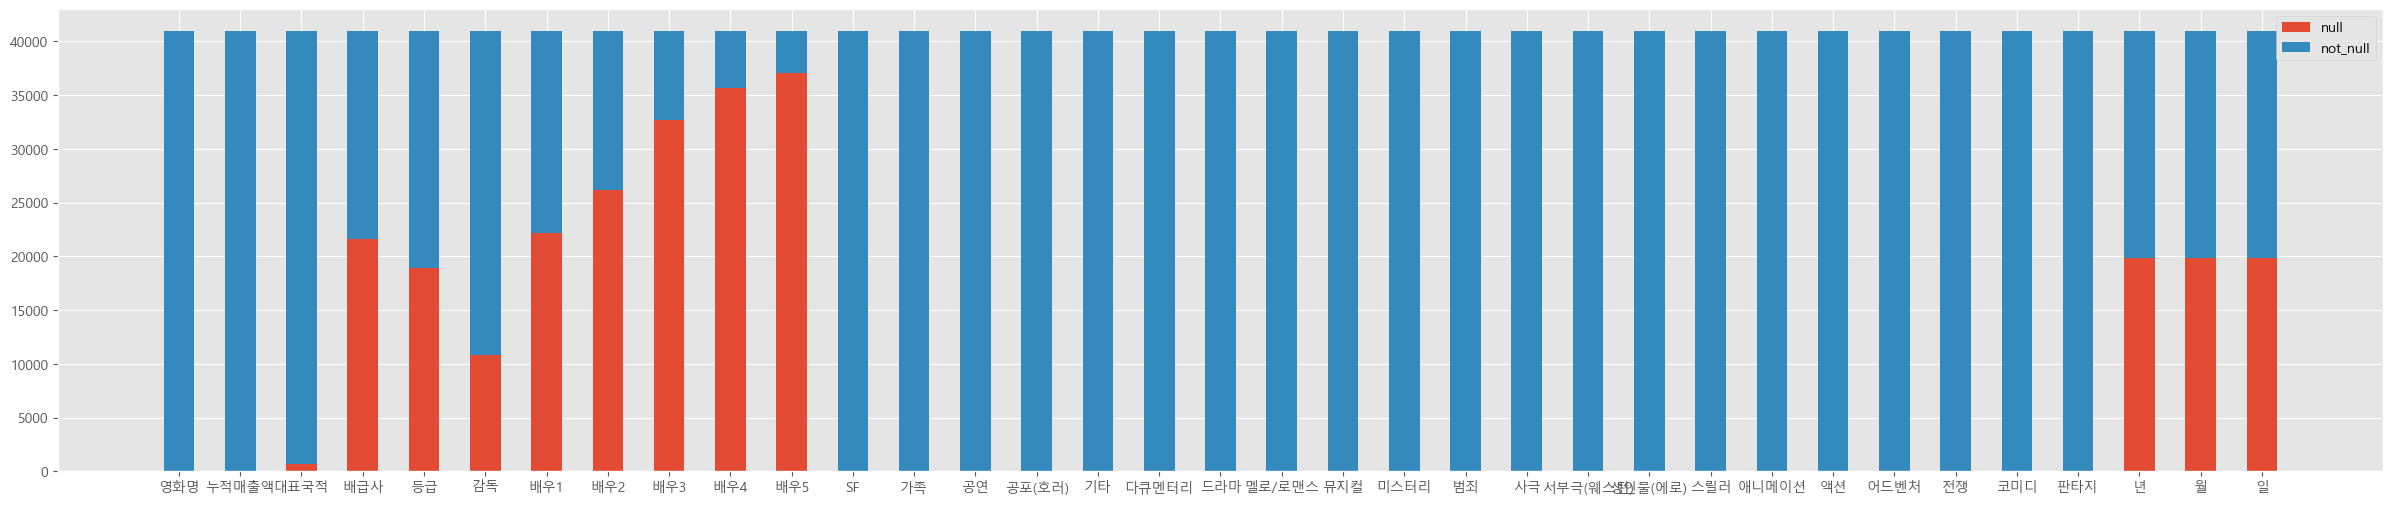

In [206]:
null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [167]:
df.head(1)

,영화명,개봉일,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,배우4,배우5,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
0,태극기 휘날리며,2004-02-05,15687180500,한국,(주)다자인소프트,15세관람가,강제규,장동건,원빈,이은주,공형진,조원희,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [168]:
categories = df.columns[df.dtypes == "object"]
print(categories)

Index(['영화명', '대표국적', '배급사', '등급', '감독', '배우1', '배우2', '배우3', '배우4', '배우5'], dtype='object')


In [ ]:
# 카테고리 변수 수치형으로 변환
from sklearn.preprocessing import LabelEncoder

for cat in categories:
    le = LabelEncoder()

    df[cat].fillna("NaN", inplace=True)
    df[cat] = df[cat].astype(str)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

In [174]:
df.head()

,영화명,개봉일,누적매출액,대표국적,배급사,등급,감독,배우1,배우2,배우3,배우4,배우5,SF,가족,공연,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,범죄,사극,서부극(웨스턴),성인물(에로),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지
0,29928,2004-02-05,15687180500,78,39,4,143,4369,3499,2387,79,1515,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,30282,2004-05-21,12777346000,20,539,4,3407,789,3402,1919,5,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7144,2004-11-05,11919939500,78,340,1,6175,4501,2472,556,184,1373,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5355,2004-09-17,11898748500,78,152,1,593,409,4102,3063,191,1617,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,30201,2004-06-03,11658584500,20,560,1,1987,831,4359,2355,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [171]:
all_df = df.copy()

In [172]:
from sklearn.model_selection import train_test_split

X = all_df.drop(["누적매출액"], axis=1)
y = all_df["누적매출액"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(32752, 32) (32752,) (8188, 32) (8188,)


In [ ]:
import lightgbm as lgb

lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets=lgb_eval,
                        num_boost_round=100
                        )

y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

print(y_pred)